<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/Swedish_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Loading the dataset from github repo

import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url='https://raw.githubusercontent.com/hargurjeet/MachineLearning/Swedish-Auto-Insurance-Dataset/insurance.csv'

df_raw=pd.read_csv(url,sep='delimiter', header=None,  engine='python')

In [4]:
df.head()

,No_Of_Claims,Total_Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [6]:
df.shape

(63, 2)

In [7]:
print(df.isnull())

    No_Of_Claims  Total_Payment
0          False          False
1          False          False
2          False          False
3          False          False
4          False          False
..           ...            ...
58         False          False
59         False          False
60         False          False
61         False          False
62         False          False

[63 rows x 2 columns]


In [10]:
df.describe()

,No_Of_Claims,Total_Payment
count,63,63
unique,40,62
top,13,77.5
freq,4,2


In [2]:
## Dropping intial junk values,renaming the column and resetting the index values
df = df_raw.drop([0, 1, 2, 3], axis=0).reset_index(drop=True).rename(columns={0:'No_Of_Claims'})
df = df.No_Of_Claims.str.split(',',expand=True).rename(columns={0:'No_Of_Claims', 1:'Total_Payment'})
df.head()

,No_Of_Claims,Total_Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No_Of_Claims   63 non-null     object
 1   Total_Payment  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [9]:
df.describe()

,No_Of_Claims,Total_Payment
count,63,63
unique,40,62
top,13,77.5
freq,4,2


In [11]:
## Convert the columns to Numberic values
df.No_Of_Claims = pd.to_numeric(df.No_Of_Claims, errors='coerce')
df.Total_Payment = pd.to_numeric(df.Total_Payment, errors='coerce')

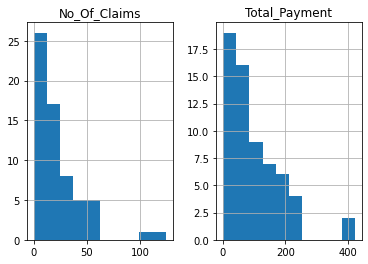

In [12]:
df.hist();

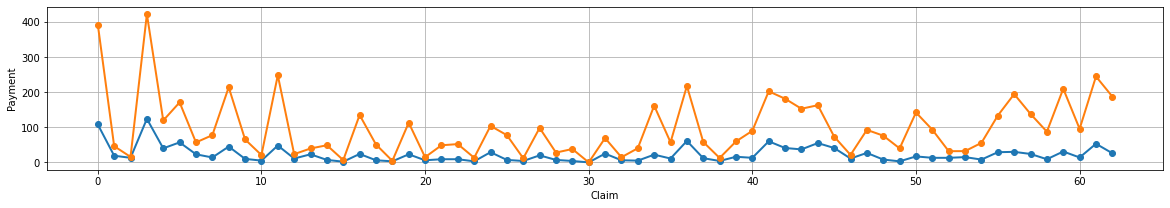

In [13]:
import matplotlib.pyplot as plt


y1 = df.No_Of_Claims
y2 = df.Total_Payment

plt.rcParams["figure.figsize"] = (20,3)

plt.plot(y1, linewidth = '2', marker = 'o')
plt.plot(y2, linewidth = '2', marker = 'o')

plt.xlabel("Claim")
plt.ylabel("Payment")

plt.grid()
plt.show()

In [14]:
##Segregating the No of claims to various categories
import numpy as np
df["No_Of_Claims_Category"] = pd.cut(df["No_Of_Claims"],
                               bins=[0.0, 15, 30, 45, 60, np.inf],
                                labels=[1, 2, 3, 4, 5])

In [15]:
df.No_Of_Claims_Category.value_counts()

1    32
2    16
3     6
4     5
5     3
Name: No_Of_Claims_Category, dtype: int64

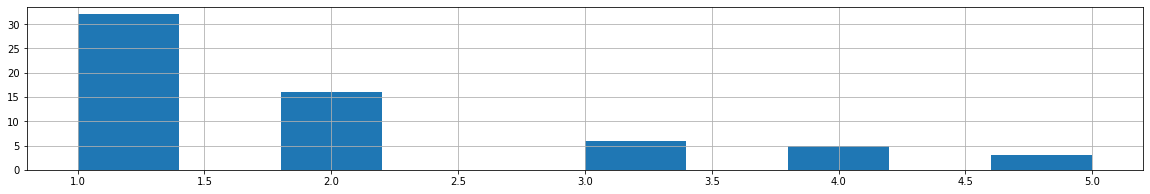

In [16]:
df.No_Of_Claims_Category.hist();

In [18]:
#Valdating if the dataset have any null values
#Filtering out the null values
df[df.No_Of_Claims_Category.isnull()]

,No_Of_Claims,Total_Payment,No_Of_Claims_Category
30,0,0.0,NaN


In [23]:
df.shape

(62, 3)

In [22]:
#Droping the NAN record
df = df.dropna().reset_index(drop=True)
df

,No_Of_Claims,Total_Payment,No_Of_Claims_Category
0,108,392.5,5
1,19,46.2,2
2,13,15.7,1
3,124,422.2,5
4,40,119.4,3
...,...,...,...
57,9,87.4,1
58,31,209.8,3
59,14,95.5,1
60,53,244.6,4


In [24]:
df.shape

(62, 3)

In [25]:
## Applyting the Stratifiedshufflesplit and ensuring No_of_claims_category is 
## equally spread across training and testing set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["No_Of_Claims_Category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [26]:
df["No_Of_Claims_Category"].value_counts()/len(df)

1    0.516129
2    0.258065
3    0.096774
4    0.080645
5    0.048387
Name: No_Of_Claims_Category, dtype: float64

In [27]:
strat_test_set["No_Of_Claims_Category"].value_counts()/len(strat_test_set)

1    0.538462
2    0.230769
3    0.076923
4    0.076923
5    0.076923
Name: No_Of_Claims_Category, dtype: float64

In [28]:
## removing the No_Of_Claims_Category column as this column is no longer needed as it was primarly created for the shuffle split
for set_ in (strat_train_set, strat_test_set):
    set_.drop("No_Of_Claims_Category", axis=1, inplace=True)

In [29]:
## Assigning Training and testing set logical names
df_prepared = strat_train_set.drop("Total_Payment", axis=1)
df_labeled =  strat_train_set.drop("No_Of_Claims", axis=1)

test_prepared = strat_test_set.drop("Total_Payment", axis=1)
test_labeled = strat_test_set.drop("No_Of_Claims", axis=1)

In [30]:
#Linear Regression
## Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df_prepared, df_labeled)
some_data = df_prepared.iloc[:5]
some_labels = df_labeled.iloc[:5]

print(f'Predictions: {np.around(reg.predict(some_data).flatten(),2)}\n Acutal Values: {some_labels.Total_Payment.iloc[:5].to_list()}')

Predictions: [104.46 121.33  47.11  36.99 198.92]
 Acutal Values: [69.2, 194.5, 76.1, 20.9, 244.6]


In [31]:
#Very inaccurate data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Predictions = reg.predict(df_prepared)
lin_mse = mean_squared_error(df_prepared, df_labeled)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(df_labeled, Predictions)
lin_mae

print('RMSE:',lin_rmse)
print('MAE:',lin_mae)

RMSE: 96.0139945156806
MAE: 30.025048703849873


In [32]:
##Running the cross validation

from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(reg, df_prepared, df_labeled,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Avg RMSE:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [45.93137478 43.33014184 23.57398472 37.80516561 29.12759566 37.67055829
 47.58755771 45.00323988 25.08031976 34.47086791]
Avg RMSE: 36.95808061602818
Standard deviation: 8.293230180668596


In [33]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_samples, n_features = 62, 1
rng = np.random.RandomState(0)
regr = make_pipeline(StandardScaler(), SVR(kernel= 'linear', C=1.0, epsilon=0.2))
regr.fit(df_prepared, df_labeled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [34]:
svc_predictions = regr.predict(df_prepared)
svc_mse = mean_squared_error(df_labeled, svc_predictions)
svc_rmse = np.sqrt(svc_mse)

scores = cross_val_score(regr, df_prepared, df_labeled,
                         scoring="neg_mean_squared_error", cv=10)
svc_rmse_scores = np.sqrt(-scores)
print()
print('Post cross validation')
display_scores(svc_rmse_scores)


Post cross validation
Scores: [73.82240535 96.92701275 34.28642177 49.59133031 50.90426606 59.99876112
 53.55074762 55.91305619 25.78977859 49.27184052]
Avg RMSE: 55.00556202751473
Standard deviation: 18.71151667230292


In [35]:
from sklearn.linear_model import Ridge

n_samples, n_features = 62, 1
rng = np.random.RandomState(0)
clf = Ridge(alpha=1.0)
clf.fit(df_prepared, df_labeled)

Ridge()

In [36]:
clf_predictions = clf.predict(df_prepared)
clf_mse = mean_squared_error(df_labeled, clf_predictions)
clf_rmse = np.sqrt(clf_mse)

scores = cross_val_score(clf, df_prepared, df_labeled,
                         scoring="neg_mean_squared_error", cv=10)
clf_rmse_scores = np.sqrt(-scores)
print()
print('Post cross validation')
display_scores(clf_rmse_scores)


Post cross validation
Scores: [45.9327644  43.33354978 23.57447461 37.80556826 29.12466157 37.6717011
 47.58767281 45.00329186 25.07885961 34.46601017]
Avg RMSE: 36.95785541719222
Standard deviation: 8.29422913778397


In [37]:
Predictions = clf.predict(test_prepared)
clf_mse = mean_squared_error(test_prepared, test_labeled)
clf_rmse = np.sqrt(clf_mse)

clf_mae = mean_absolute_error(test_labeled, Predictions)
clf_mae

print('RMSE:',clf_rmse)
print('MAE:',clf_mae)

RMSE: 118.03624932132566
MAE: 23.204578356553068


NameError: ignored

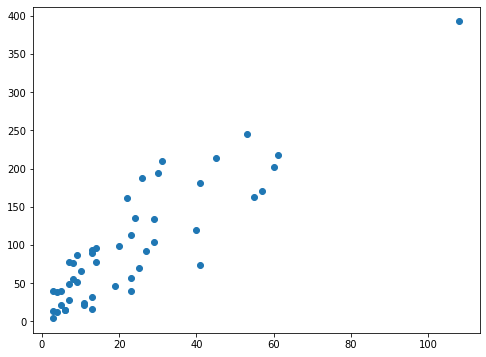

In [38]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(df_prepared, df_labeled)
plt.plot(df_prepared,lin.predict(df_prepared),color='red');